$$\textbf {El Maghraoui Aymane}$$


$$\textbf {Application}$$

Je vais construire un modèle de régression linéaire pour un ensemble de données sur les prix des voitures. Le jeu de données contient les caractéristiques suivantes : nom de la voiture, année, prix de vente, prix actuel, nombre de kilomètres parcourus, type de carburant, type de vendeur, transmission et propriétaire. Ces caractéristiques constituent les variables indépendantes, tandis que le prix de vente est la variable dépendante. L'objectif est de prédire le prix des voitures en fonction de ces différents facteurs.

In [3]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

In [95]:
df = pd.read_csv(filepath_or_buffer="./car data.csv")
print(df.head())
print("#######################################")
# print(df.info())
print(df.describe())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
#######################################
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price vs Year')

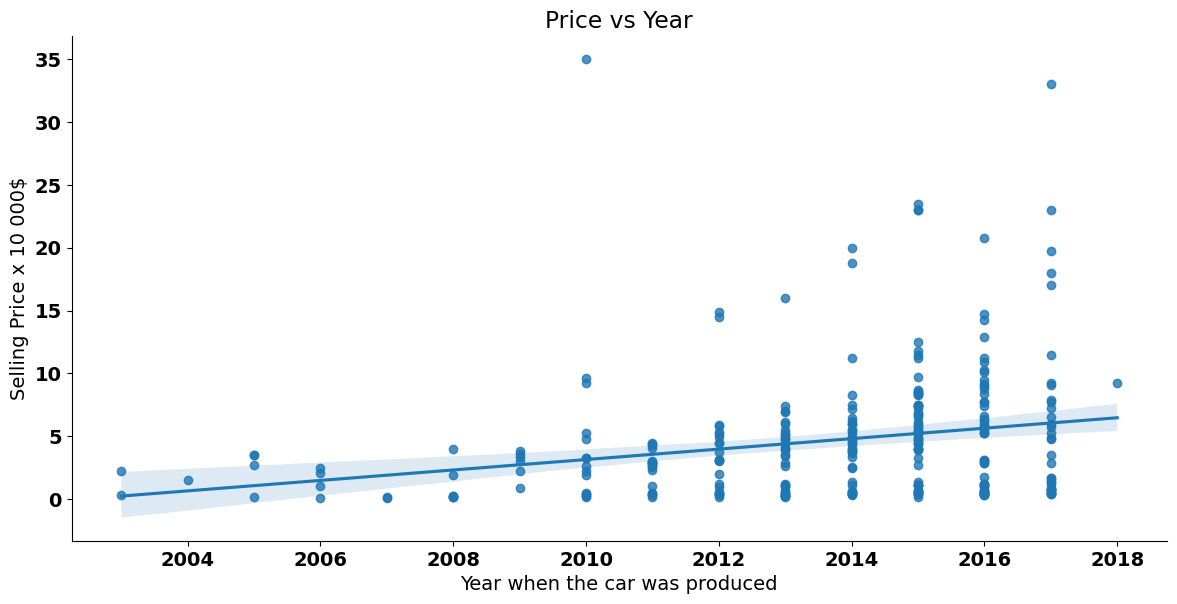

In [93]:
sns.lmplot(x="Year",y="Selling_Price",data=df,aspect=2,height=6)
plt.xlabel("Year when the car was produced")
plt.ylabel("Selling Price x 10 000$")
plt.title("Price vs Year")

Text(0.5, 1.0, 'Missing value in the dataset')

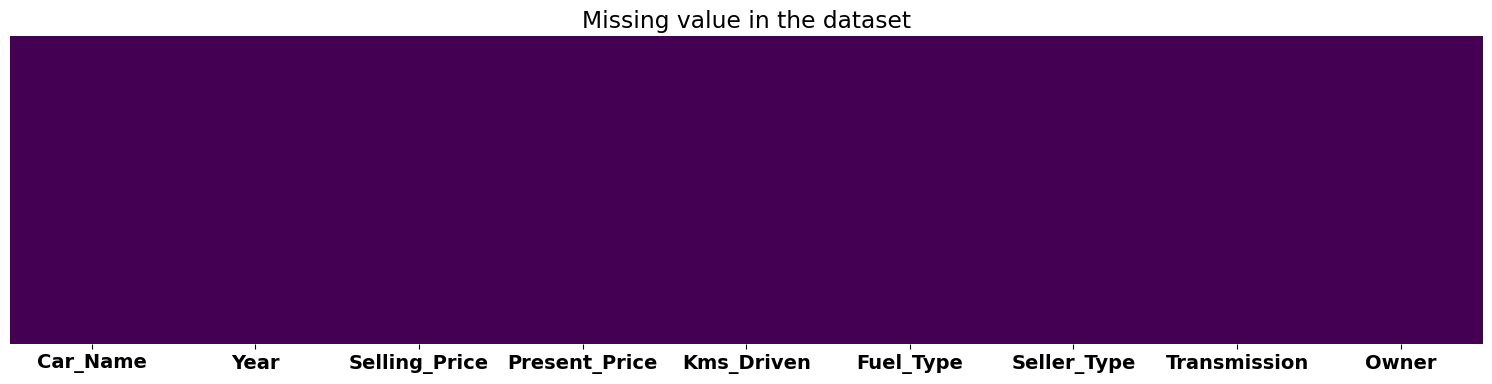

In [55]:
plt.figure(figsize=(19,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

Il n'y a aucune valeur manquante dans les données

<Axes: >

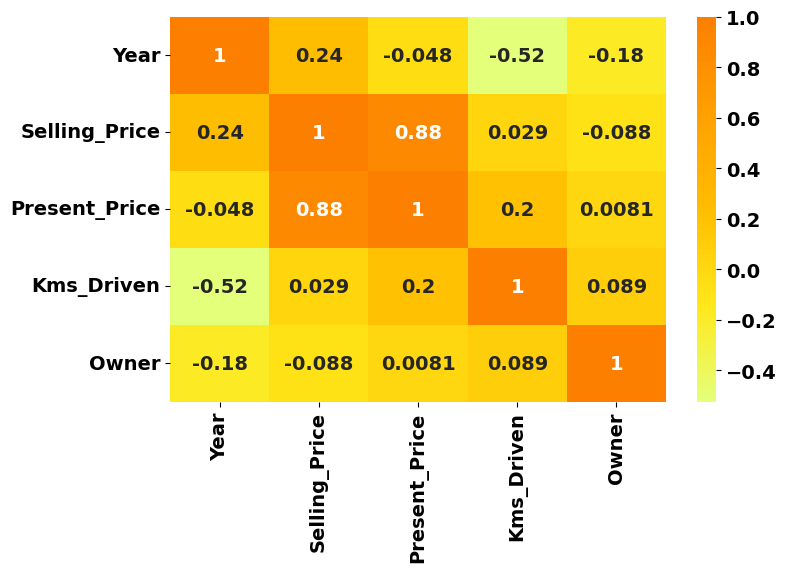

In [56]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr,annot=True,cmap='Wistia')


Il existe une corrélation significative entre le prix de vente et le prix actuel.

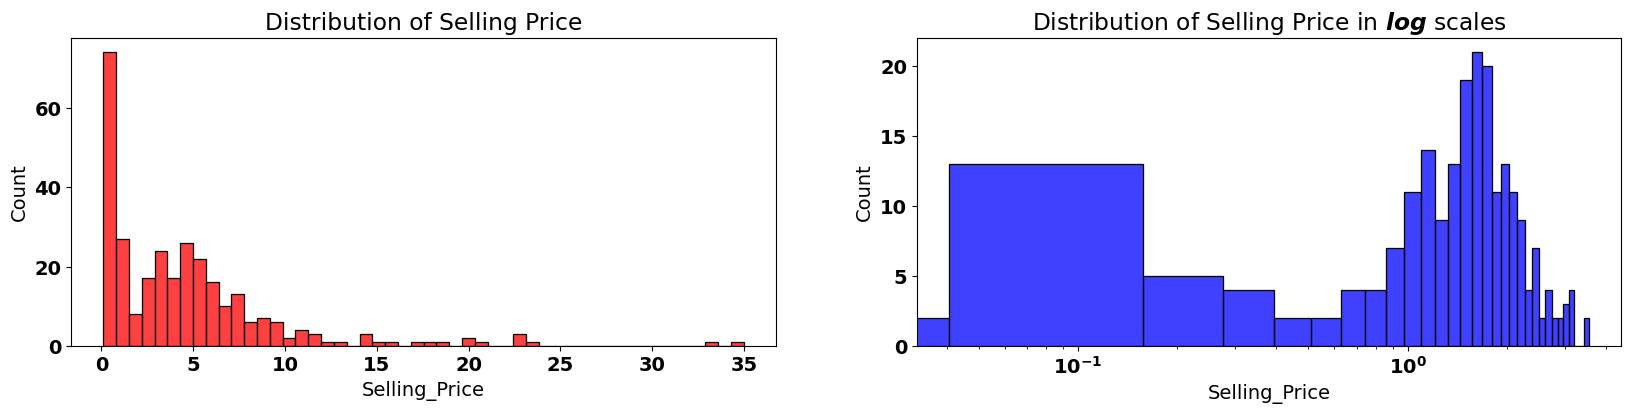

In [96]:
f = plt.figure(figsize=(20,4))

ax = f.add_subplot(121)
sns.histplot(df["Selling_Price"],bins=50,color="r",ax=ax)
ax.set_title("Distribution of Selling Price")

ax = f.add_subplot(122)
sns.histplot(np.log(df["Selling_Price"]),bins=50,color="b",ax=ax)
ax.set_title("Distribution of Selling Price in $log$ scales")
ax.set_xscale("log")

Si nous regardons le graphique de gauche, les prix de ventes varient de 0.10 (x 10 000$) à 35 (x 10 000$), le graphique est asymétrique à droite.
Dans le tracé de droite, nous appliquerons le Log naturel, puis le tracé tend approximativement vers la normale. pour une analyse plus approfondie, nous appliquerons Log aux frais variables cibles.


Text(0.5, 1.0, 'Violin plot of Selling Price vs Fuel Type')

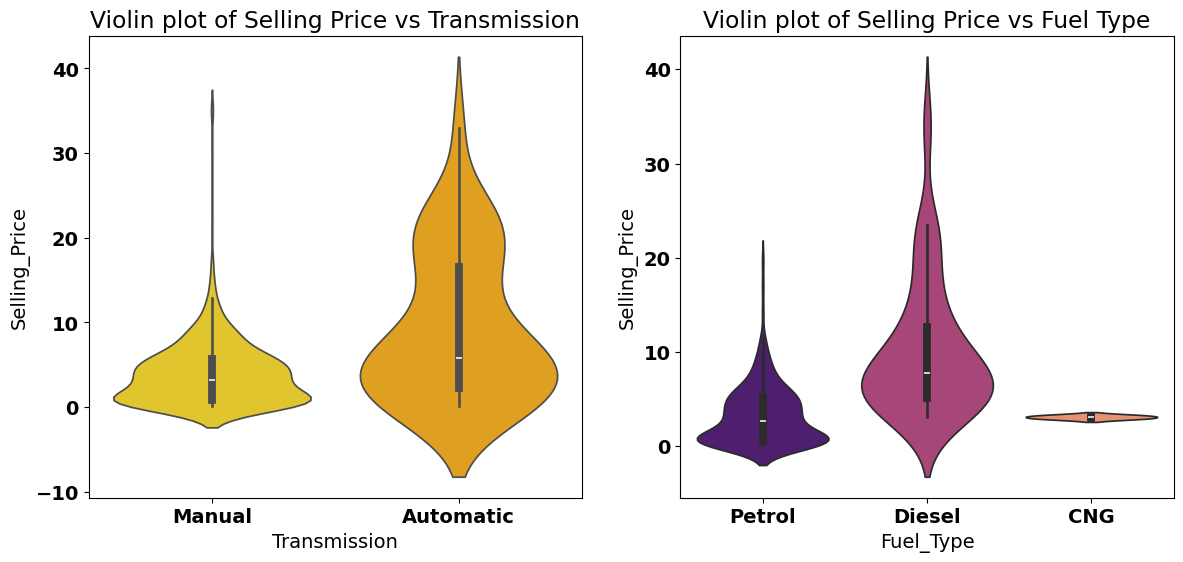

In [58]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='Transmission', y='Selling_Price',data=df,palette='Wistia',ax=ax,hue="Transmission",legend=False)
ax.set_title('Violin plot of Selling Price vs Transmission')

ax = f.add_subplot(122)
sns.violinplot(x='Fuel_Type', y='Selling_Price',data=df,palette='magma',ax=ax,hue="Fuel_Type",legend=False)
ax.set_title('Violin plot of Selling Price vs Fuel Type')

Graphique de gauche : La transmission manuelle et automatique présentent des prix de vente dans des plages similaires. En moyenne, les prix de vente semblent légèrement plus élevés pour les transmissions automatiques, se situant autour de 10 à 40 (x 10 000$).

Graphique de droite : Le type de carburant influence considérablement les prix de vente. Les véhicules à essence (Petrol) ont une distribution plus concentrée autour de valeurs plus basses. Les véhicules diesel affichent une plus grande variabilité avec des prix pouvant aller jusqu'à 40 (x 10 000$), tandis que les véhicules au gaz naturel comprimé (CNG) ont une plage de prix beaucoup plus restreinte

Text(0.5, 1.0, 'Box plot of Kms Driven vs Year')

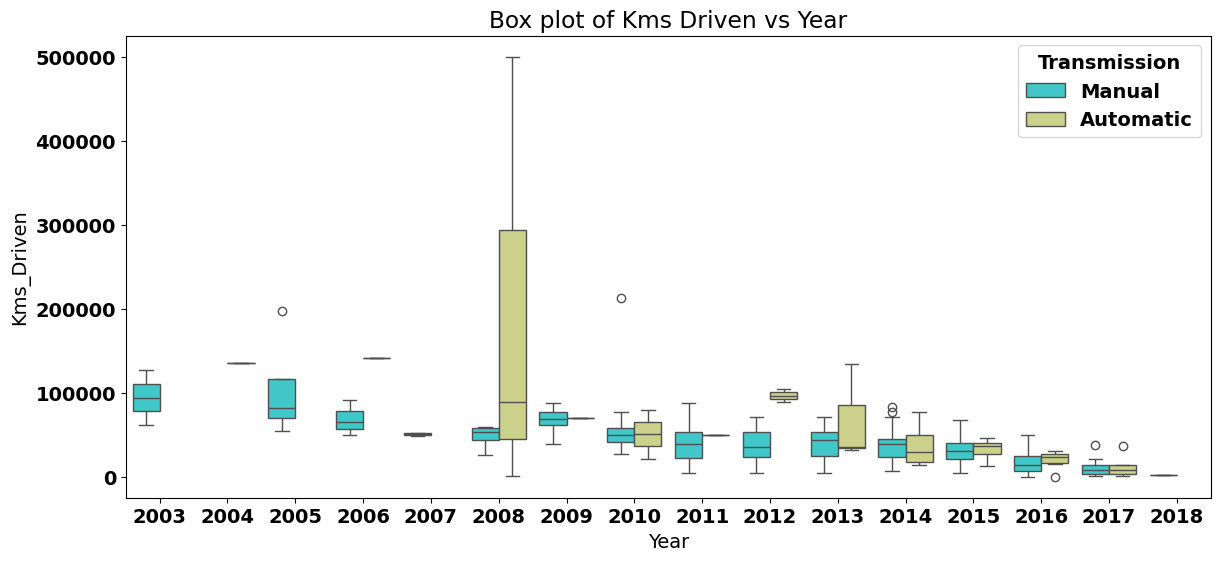

In [59]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Year', y='Kms_Driven',hue='Transmission',data=df,palette='rainbow')
plt.title('Box plot of Kms Driven vs Year')

Text(0.5, 1.0, 'Violin plot of Transmission vs Selling Price')

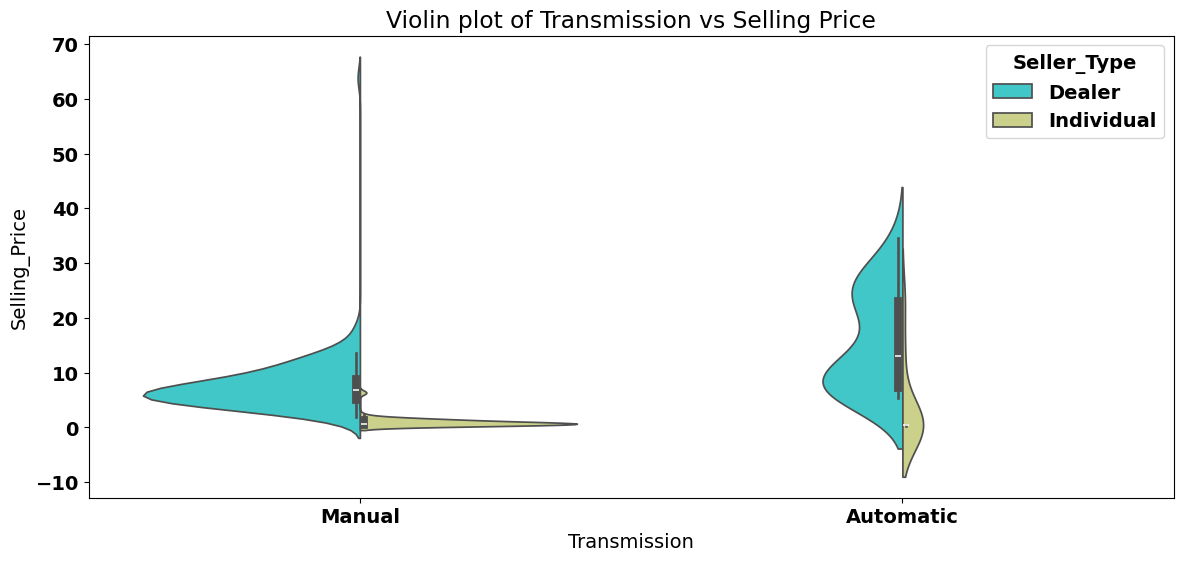

In [255]:
plt.figure(figsize=(14,6))
sns.violinplot(x='Transmission', y='Selling_Price',hue='Seller_Type',data=df,palette='rainbow',split=True)
plt.title('Violin plot of Transmission vs Selling Price')

Text(0.5, 1.0, 'Scatter plot of Present Price vs Selling Price')

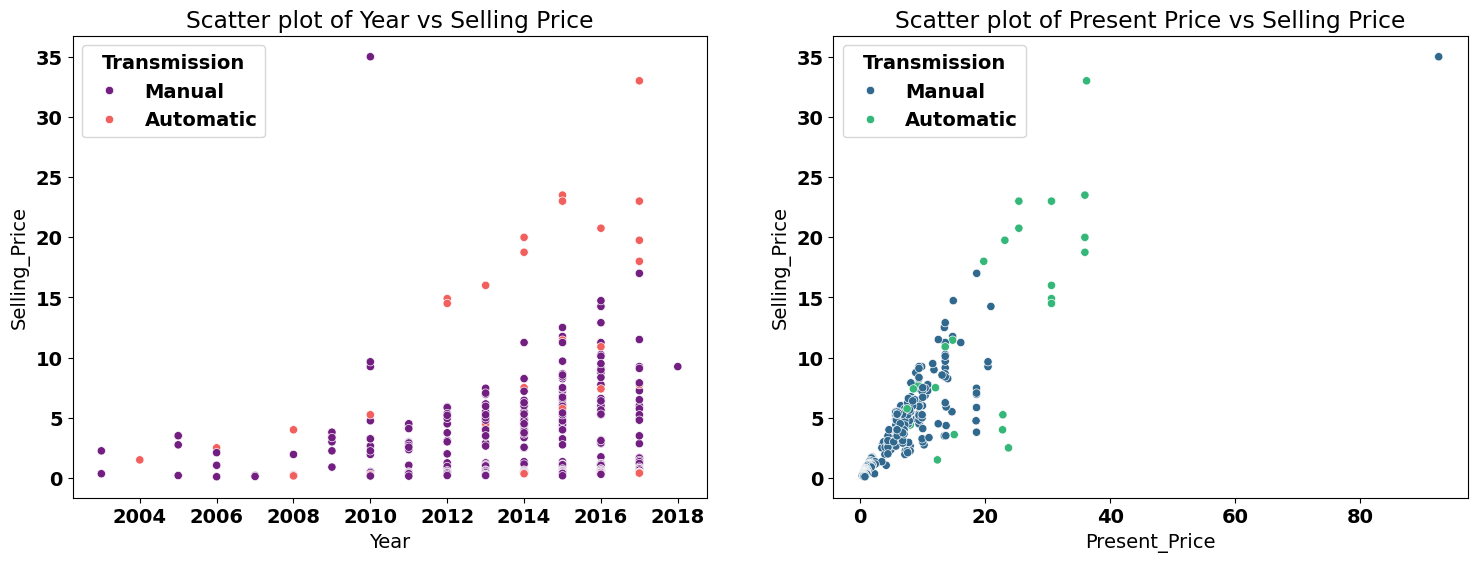

In [97]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.scatterplot(x='Year',y='Selling_Price',data=df,palette='magma',hue='Transmission',ax=ax)
ax.set_title('Scatter plot of Year vs Selling Price')

ax = f.add_subplot(122)
sns.scatterplot(x='Present_Price',y='Selling_Price',data=df,palette='viridis',hue='Transmission')
ax.set_title('Scatter plot of Present Price vs Selling Price')


**1.Année vs Prix de vente :** 
$$ $$
On observe que les véhicules récents (années 2016-2018) se vendent généralement à des prix plus élevés, surtout ceux avec une transmission automatique. Cela reflète probablement une demande accrue pour les véhicules plus récents ou des fonctionnalités plus avancées dans les modèles automatiques. Les véhicules plus anciens, en revanche, ont des prix de vente nettement inférieurs.

**2.Prix actuel vs Prix de vente :**
$$ $$
Une forte corrélation positive entre le prix actuel et le prix de vente est évidente. Cela indique que les véhicules de plus grande valeur (prix actuel élevé) sont également vendus à des prix plus élevés. Les transmissions automatiques semblent être préférées dans les segments de prix plus élevés, tandis que les transmissions manuelles dominent les gammes inférieures.

In [4]:
df = pd.read_csv("./car data.csv")

df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)
df.drop('Car_Name', axis=1, inplace=True)

for i in range(len(df['Present_Price'])):
    
    if df["Car_Age"].iloc[i] >= 10:
        df.loc[i, "Car_Age"] = 1  
    else:
        df.loc[i, "Car_Age"] = 0 

    # On va regrouper les noms des voitures de prix élevés et faibles dans deux catégories
    if df["Present_Price"].iloc[i] > np.mean(df["Present_Price"]):
        df.loc[i, "Car_Name"] = "High_Price"
    else:
        df.loc[i, "Car_Name"] = "Low_Price"
    # df['Car_Name'] = df['Car_Name'].map(df['Car_Name'].value_counts())


# droping column Present Price cause of the correlation betwee it and Selling Price
# Replace the values of Selling Price with the mean of the column Present Price and Selling Price
df['Selling_Price'] = (df['Selling_Price'] + df['Present_Price']) / 2
df.drop('Present_Price',axis=1,inplace=True)

columns = ["Car_Name",'Fuel_Type', 'Seller_Type', 'Transmission']
df_encode = pd.get_dummies(data = df, columns=columns,drop_first=True,
                           dtype='int8')



In [226]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Selling_Price' 'Kms_Driven' 'Fuel_Type' 'Seller_Type' 'Transmission'
 'Owner' 'Car_Age']

Number of rows and columns in the dataset: (301, 7)

Columns in data frame after encoding dummy variable:
 ['Selling_Price' 'Kms_Driven' 'Owner' 'Car_Age' 'Fuel_Type_Diesel'
 'Seller_Type_Individual' 'Transmission_Manual']

Number of rows and columns in the dataset: (301, 7)


In [5]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['Selling_Price'],alpha=0.05)
ci,lam

((0.09234701580266258, 0.28376114964202903), 0.18879478062172522)

Lmabda est différent de 0 alors on va appliquer la transformation boxcox sur la variable Selling_Price.

In [6]:
df_encode['Selling_Price'] = boxcox(df_encode['Selling_Price'], lmbda=lam)

Les variables catégorielles d'origine sont supprimées et l'une des colonnes de variables d'encodage à chaud pour la variable catégorielle particulière est également supprimée de la colonne. Nous avons donc terminé les trois étapes d’encodage en utilisant la fonction Get Dummies.

In [7]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('Selling_Price',axis=1) 
y = df_encode['Selling_Price'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Data Processing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled,y_train)

# The parameters for linear regression model
columns = ['intersect:x_0=1'] + list(X.columns.values)

sk_theta = [model.intercept_]+list(model.coef_)

parameter_df = pd.DataFrame({"column":columns,'Sklearn_theta':sk_theta})
parameter_df

,column,Sklearn_theta
0,intersect:x_0=1,1.631863
1,Kms_Driven,-0.028924
2,Owner,0.130045
3,Car_Age,-0.049600
4,Car_Name_Low_Price,-0.529354
5,Fuel_Type_Diesel,0.328150
6,Fuel_Type_Petrol,0.154056
7,Seller_Type_Individual,-0.884342
8,Transmission_Manual,-0.162103


In [9]:
# sklearn regression module
y_pred_sk = model.predict(X_test_scaled)

# #Evaluvation 
# # MSE

J_mse_sk = mean_squared_error(y_test, y_pred_sk)

# R_square
R_square_sk_test = model.score(X_test_scaled,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk_test)

The Mean Square Error(MSE) or J(theta) is:  0.3036181190361044
R square obtain for scikit learn library is : 0.8716114943471722


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

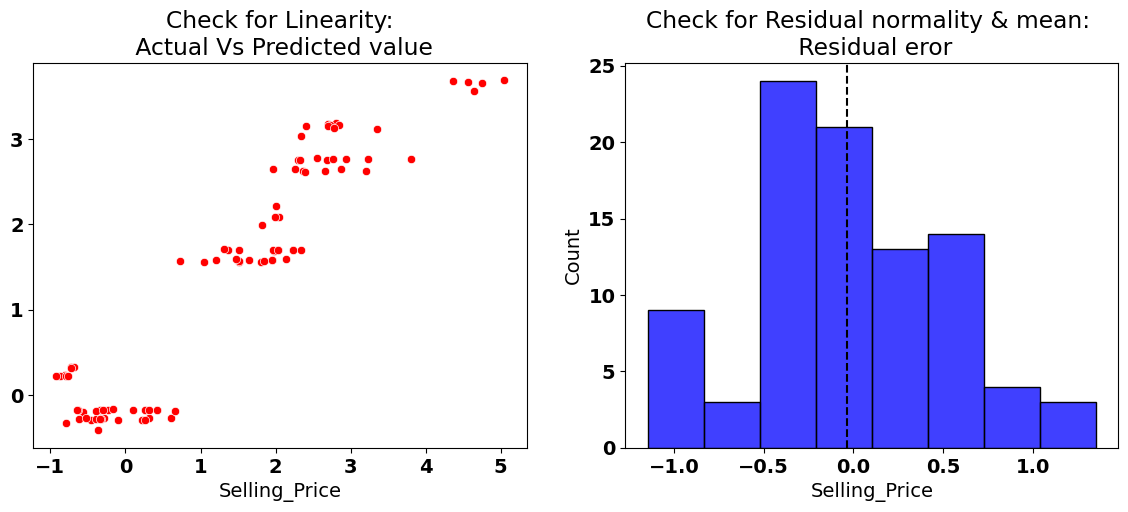

In [250]:
# Check for Linearity ; X_test[:,0], X_test[:,1]
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

**Graphique de gauche (Actual vs Predicted) :**
 La relation entre les valeurs réelles et prédites semble linéaire dans l'ensemble, mais on observe des écarts significatifs à certains niveaux, suggérant une possible amélioration du modèle pour capturer certaines dynamiques.

**Graphique de droite (Residual Normality) :** L'histogramme des résidus montre une distribution proche de la normale avec une symétrie autour de zéro. Cela indique que l'hypothèse de normalité des résidus est globalement respectée, un bon signe pour la validité du modèle.

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

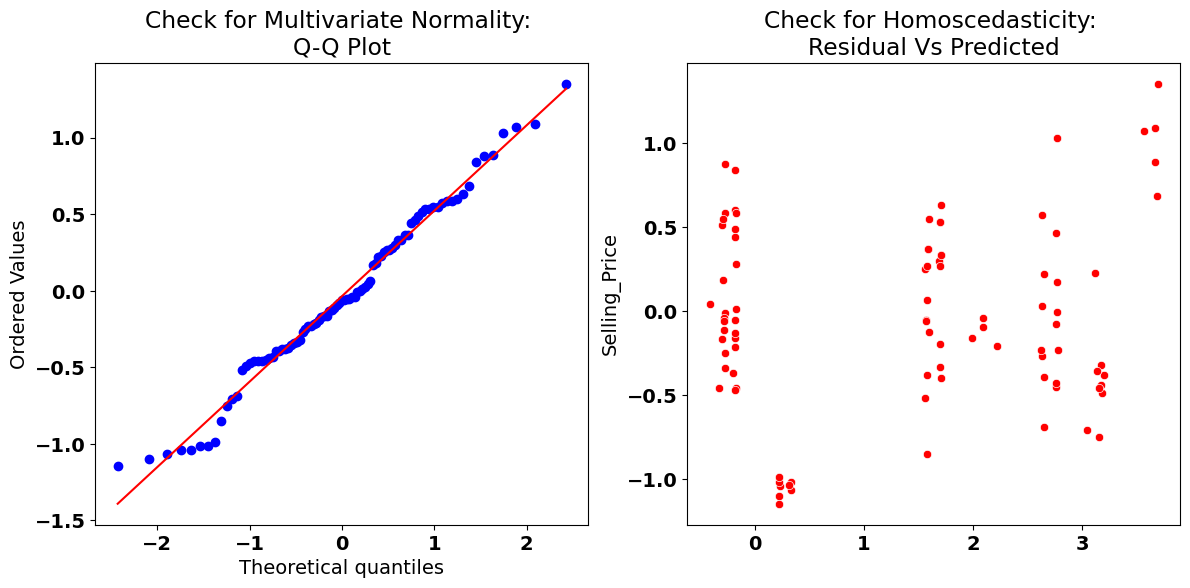

In [251]:
# Check for Multivariate Normality

# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

Le Q-Q plot montre que les résidus suivent une distribution normale, ce qui est positif pour le modèle. Cependant, le graphique des résidus vs. valeurs prédites révèle une possible hétéroscédasticité (variance non constante), ce qui pourrait affecter la validité des prédictions. Une analyse supplémentaire est conseillée.


In [252]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1 / ( 1  - R_square_sk_test)
VIF,R_square_sk_test

(7.788859251186205, 0.8716114943471722)

Il existe une multicollinéarité critique entre les variables explicatives. 


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                  Feature       VIF
0              Kms_Driven  2.375349
1                   Owner  1.069359
2                 Car_Age  2.467629
3      Car_Name_Low_Price  4.351635
4        Fuel_Type_Diesel  2.591426
5        Fuel_Type_Petrol  8.623781
6  Seller_Type_Individual  2.300269
7     Transmission_Manual  7.793814
